1. Выборка - это подмножетсва данных из более крупного набора (популяции=генеральная совокупность)

2. Случайный отбор - это процесс при котором каждый доступный член популяции , подвергаемый отбору имеет равную возможность попасть в выборку при его извлечении

3. Качество данных имеет большее значение чем их количество когда создается модель или  выполняется оценка на основе выборке.Статистика добавляет сюда слово РЕПРЕЗЕНТАТИВНОСТЬ

4. Обычно x с чертной используется для среднего выборки, а "мю" для среднеего популяции

5. В типичной ситуации выборка извелкается с целью измерения чего-либо (при помощи выборочной статистики) либо моделирования чего-либо (при помощи статистической или автоматически аобущающийся модели)

6. Статистика - это числовая величина, описывающая выборку из популяции

          income        type
846    40000.000        Data
13836  42000.000        Data
42118  24000.000        Data
6357   75000.000        Data
42912  42000.000        Data
...          ...         ...
995    65454.900  Mean of 40
996    71056.975  Mean of 40
997    63607.875  Mean of 40
998    73800.525  Mean of 40
999    63419.800  Mean of 40

[3000 rows x 2 columns]


/Users/tatanaternovaa/Documents/training-skills/.venv/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/var/folders/f8/9r5znv851hdf_w4bqhp6c6bc0000gn/T/ipykernel_1130/421897139.py:36: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


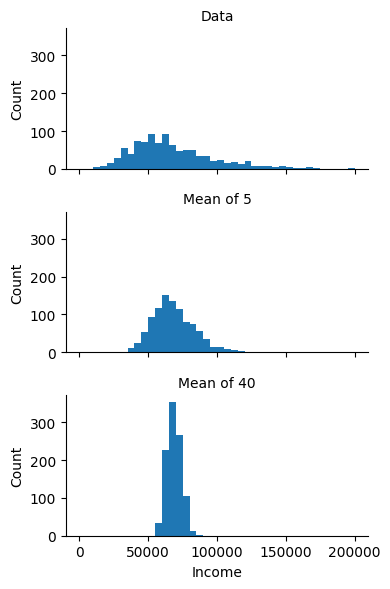

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt

loans_income = pd.read_csv("LOANS_INCOME.CSV").squeeze("columns")

sample_data = pd.DataFrame(
    {
        "income": loans_income.sample(1000),
        "type": "Data",
    }
)

sample_mean_05 = pd.DataFrame(
    {
        "income": [loans_income.sample(5).mean() for _ in range(1000)],
        "type": "Mean of 5",
    }
)

sample_mean_20 = pd.DataFrame(
    {
        "income": [loans_income.sample(40).mean() for _ in range(1000)],
        "type": "Mean of 40",
    }
)

results = pd.concat([sample_data, sample_mean_05, sample_mean_20])

print(results)
g = sns.FacetGrid(results, col="type", col_wrap=1, height=2, aspect=2)
g.map(plt.hist, "income", range=[0, 200000], bins=40)
g.set_axis_labels("Income", "Count")
g.set_titles("{col_name}")

plt.tight_layout()
plt.show()

7. Центральная предельная теорема
Средние значения извлеченные из многочисленных выборок напоминают колоколообразную нормальную кривую даже если исходная популяция не является нормально распределенными

8. Стандартная ошибка - это оиночная метрика которая обощает вариабельность статистической величины.
Подход к измерению стандратной ошибки:
1) собрать ряд новых выборок из популяции
2) по каждой выборке вычислить статистику (например среднеее)
3) вычислить стандратное отклонение статистики вычисленной на шаге 2 и использовать ее в качестве стандратной ошибки

СТАНДАРТНАЯ ОШИБКА ПОКАЗЫВАЕТ вариабельность выборочной метрики
СТАНДАРТНОЕ ОТКЛОНЕНИЕ ПОКАЗЫВАЕТ вариабельность отедльных точек данных


9. Бутстрап (bootstrap) - это процес повторного извлечения выборки из популяции и перевычисление статистики или модель
Бутстрап можно представить как репликацию исходной выборки тысячи и миллионы раз  чтобы получить гипотетичскую популяцию. Затем из этой гипотетической популяции можно извлекать выборку с целью оценивания выборочного рапределения

10. Дверетильные интервалы - типичный способ представления оценок в форме интервального диапазона

11. НОРМАЛЬНОЕ РАСПРЕДЕЛЕНИЕ (гауссовое)
В статистике колоколообразное распределение считается каноническим.
Распределение выборочных статистик часто имеют нормальную форму.
В нормальном распределении 68% данных находятся с пределеах 1 стандартного отклонения от среднего и 95% - впределеах двух стандартных отклонений от среднего

12. СТАНДАРТИЗАЦИЯ - процедура вычитания среднего и разделить на стандартное отклонение. Испольщуется для сравнения данных с нормальным распределением. Полученное значение называют z-оценкой или стандратное оценкой. 

13. Квантиль-квантильный график используют для того чтобы определить насколько выборка близка к нормальному распределению.
Standard Normal and QQ-Plots

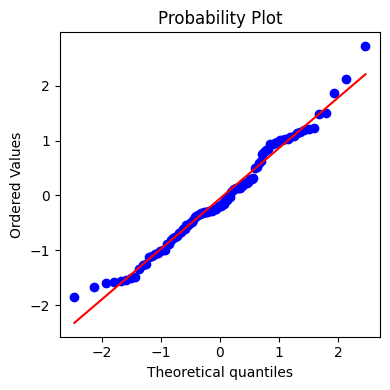

In [12]:
from pathlib import Path
import pandas as pd
import numpy as np
from scipy import stats

import seaborn as sns
import matplotlib.pylab as plt
fig, ax = plt.subplots(figsize=(4, 4))

norm_sample = stats.norm.rvs(size=100)
stats.probplot(norm_sample, plot=ax)

plt.tight_layout()
plt.show()

14. Длинохвостные распределения
Большая часть данных не является нормально распределенной
Принятие нормального распределения в качестве исходного может привести к недооценке предельных событий

15. t-распределение или распределение Стьюдента
это распределение нормальной формы, но немного толще и длинее на хвостах

Распределение выборочных средних имеет форму как у t-распределения